# data Details 


- Machine Learning LifeCycle
    1. Data Ingestion
    2. EDA 
    3. Preprocessing
    4. Model Building
    5. Performance Metrics
    
    

- Problem Statement
    
       - The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
        122 instances for each region.
        The period from June 2012 to September 2012.
        The dataset includes 11 attribues and 1 output attribue (class)
        The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.
    
    
- Feature Description
    1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
    2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
    3. RH : Relative Humidity in %: 21 to 90
    4. Ws :Wind speed in km/h: 6 to 29
    5. Rain: total day in mm: 0 to 16.8 FWI Components
    6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
    7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
    8. Drought Code (DC) index from the FWI system: 7 to 220.4
    9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
    10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
    11. Fire Weather Index (FWI) Index: 0 to 31.1
    12. Classes: two classes, namely Fire and not Fire
    
    

- Machine Learning Models Used
    1. Linear Regression
    2. Ridge Regression
    3. Lasso Regression
    4. Elastic-Net Regression
    
- Assumtion of Linear Regession https://towardsdatascience.com/assumptions-of-linear-regression-fdb71ebeaa8b

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

# Data Cleaning

In [4]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [5]:
# how big the Data is
df.shape

(246, 14)

In [6]:
# how the data is distributed
df.describe().T


,count,unique,top,freq
day,246,33,01,8
month,245,5,07,62
year,245,2,2012,244
Temperature,245,20,35,29
RH,245,63,64,10
Ws,245,19,14,43
Rain,245,40,0,133
FFMC,245,174,88.9,8
DMC,245,167,7.9,5
DC,245,199,8,5


In [7]:
df.columns = df.columns.str.strip()


In [8]:
df[df['day']=='Sidi-Bel Abbes Region Dataset']['day'] = np.nan
df[df['day']=='day']['day']= np.nan
df[df['year']=='year']['year']= np.nan
df[df['day']=='Sidi-Bel Abbes Region Dataset']
df.iloc[122,:][0] = np.nan
df1 = df.drop(123)


In [9]:
df1.dropna(inplace=True)

In [10]:
df1['Classes'] = df1['Classes'].str.strip()

In [11]:
cl = list(df1.columns)
for i in cl[:-1:]:
    df1[i] = pd.to_numeric(df1[i])


In [12]:
from sklearn.preprocessing import LabelEncoder
lb  = LabelEncoder()
df1['Classes'] = lb.fit_transform(df1['Classes'])

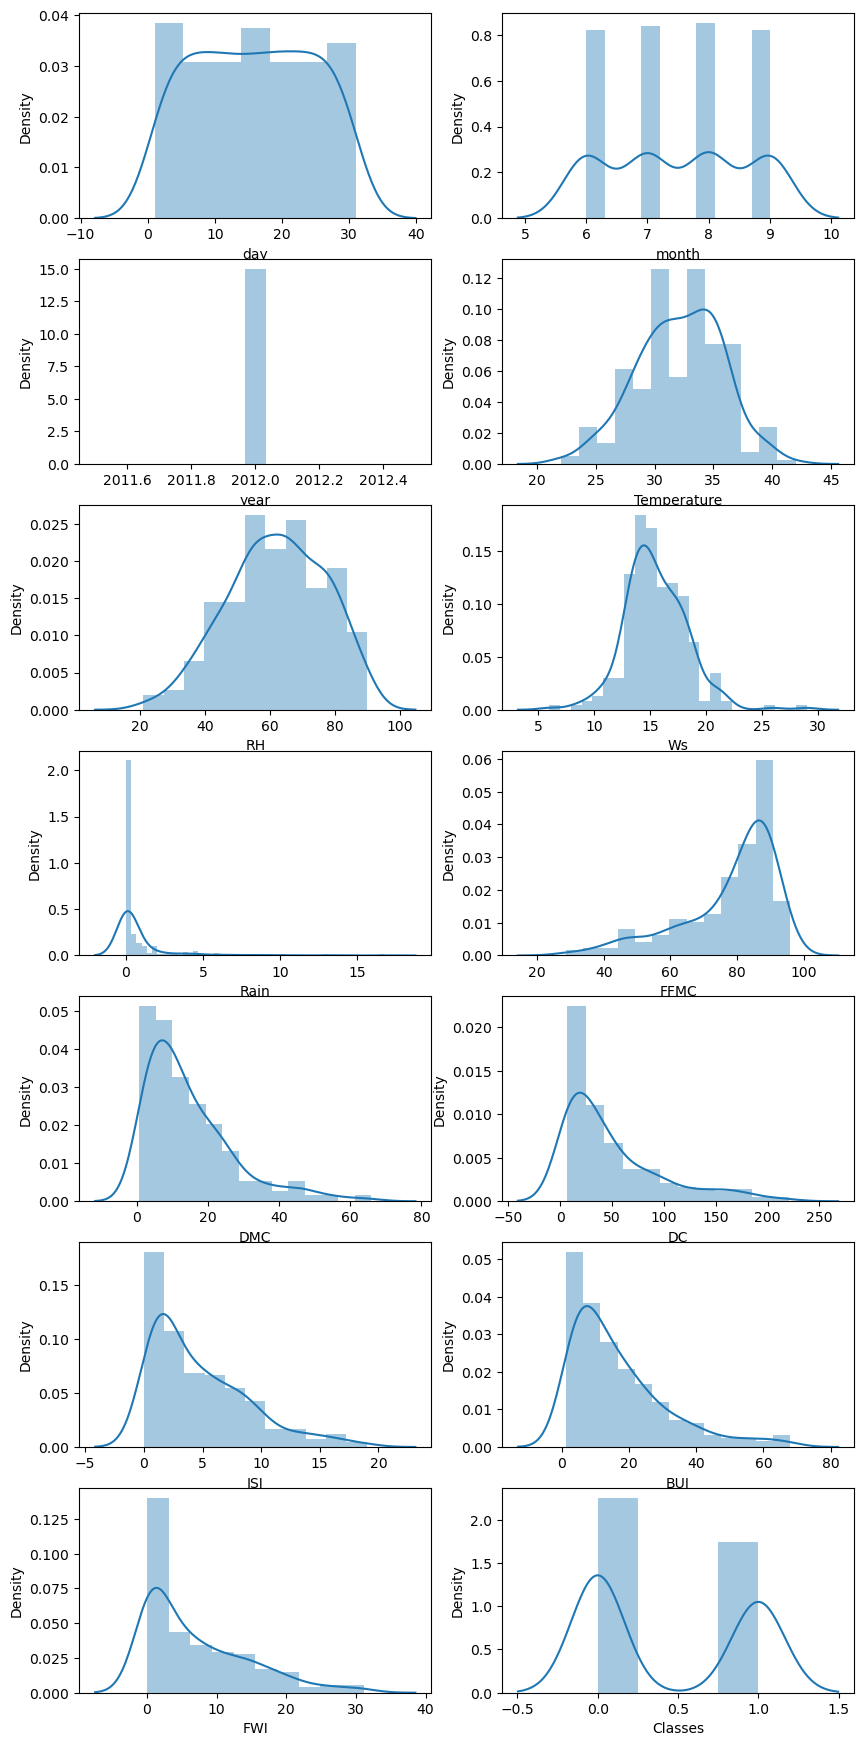

In [13]:
plt.figure(figsize=(10,25))
for i in zip(df1.columns,list(range(len(df1.columns)))):
   
    plt.subplot(8,2,i[1]+1)
    sns.distplot(df1[i[0]])

# Model Buliding

In [14]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

In [15]:
x = df1.drop('Temperature',axis=1)
y = df1['Temperature']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=32)

# Linear Regression:

In [16]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_predict = lr.predict(X_test)
print("Train Score:",lr.score(X_train,y_train))
print('Test Score: ',lr.score(X_test,y_test))
from sklearn.metrics import r2_score
score=r2_score(y_test,lr_predict)
print("The R2 Score for the model builded is",score)
Adjusted_r=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("The Adjusted R Square for the model is",Adjusted_r)

Train Score: 0.5796076040993602
Test Score:  0.5761842043675531
The R2 Score for the model builded is 0.5761842043675531
The Adjusted R Square for the model is 0.41876690884693


In [17]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
X_train_s = standard.fit_transform(X_train)
X_test_s =standard.transform(X_test)

In [18]:
# After Standartization
lr.fit(X_train_s,y_train)
lr_predict = lr.predict(X_test_s)
print("Train Score:",lr.score(X_train_s,y_train))
print('Test Score: ',lr.score(X_test_s,y_test))
from sklearn.metrics import r2_score
score=r2_score(y_test,lr_predict)
print("The R2 Score for the model builded is",score)
Adjusted_r=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test_s.shape[1]-1)
print("The Adjusted R Square for the model is",Adjusted_r)

Train Score: 0.5796076040993601
Test Score:  0.5761842043675535
The R2 Score for the model builded is 0.5761842043675535
The Adjusted R Square for the model is 0.41876690884693046


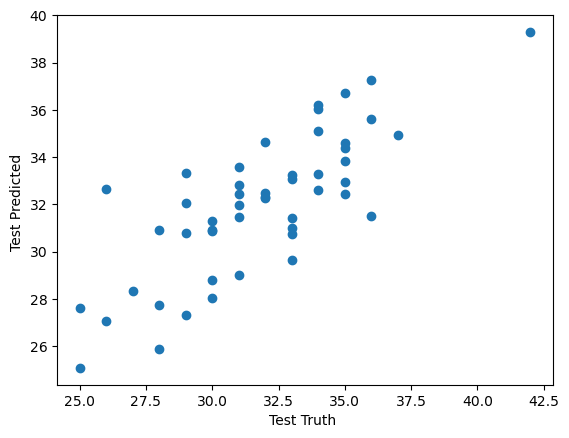

In [51]:
# ASSUMPTION
plt.scatter(y_test,lr_predict)
plt.xlabel("Test Truth ")
plt.ylabel("Test Predicted ")
plt.show()

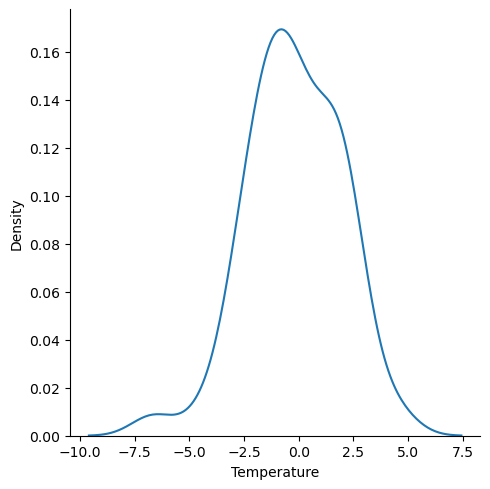

In [42]:
residuals=y_test-lr_predict
sns.displot(residuals,kind='kde')

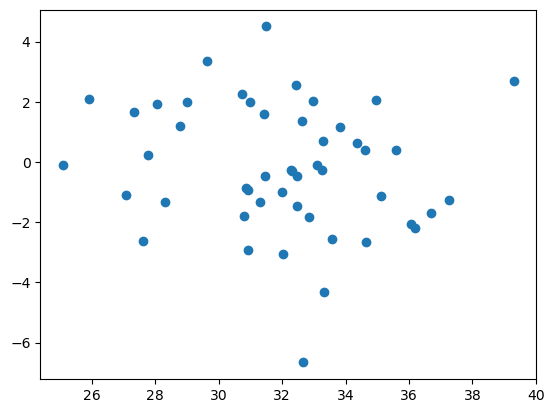

In [43]:
plt.scatter(lr_predict,residuals)

In [46]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
{x.columns[i]: variance_inflation_factor(x.values, i) for i in range(1, x.shape[1])}

{'month': 1.0593677394567451,
 'year': 381.03887723157646,
 'RH': 2.860679742317785,
 'Ws': 1.2618825859478544,
 'Rain': 1.5751316142697394,
 'FFMC': 5.301788307992688,
 'DMC': 77.36193951221615,
 'DC': 25.199194461781985,
 'ISI': 23.250581619252316,
 'BUI': 172.04514981024676,
 'FWI': 41.1884258115508,
 'Classes': 3.474838521935455}

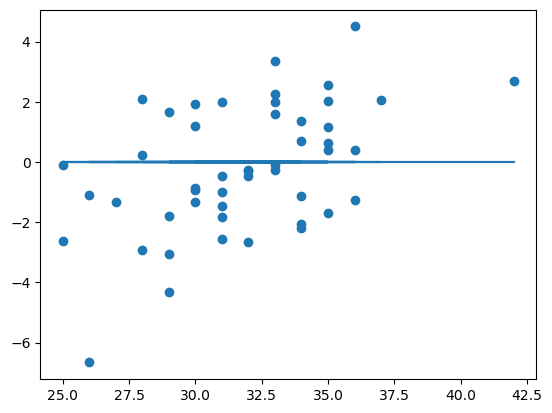

In [50]:
plt.scatter(y_test, residuals)
plt.plot(y_test, [0]*len(y_test))

# Ridge Regression

In [19]:
rid = Ridge()
print(rid.fit(X_train_s,y_train))
lr_predict = rid.predict(X_test_s)
print("Train Score:",rid.score(X_train_s,y_train))
print('Test Score: ',rid.score(X_test_s,y_test))
from sklearn.metrics import r2_score
score=r2_score(y_test,lr_predict)
print("The R2 Score for the model builded is",score)
Adjusted_r=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test_s.shape[1]-1)
print("The Adjusted R Square for the model is",Adjusted_r)

Ridge()
Train Score: 0.5791326452390795
Test Score:  0.5916874165048187
The R2 Score for the model builded is 0.5916874165048187
The Adjusted R Square for the model is 0.4400284569208942


In [21]:
# Lasso Regression 
las =Lasso(alpha=0.04,max_iter=1000)
print(las.fit(X_train_s,y_train))
lr_predict = las.predict(X_test_s)
print("Train Score:",las.score(X_train_s,y_train))
print('Test Score: ',las.score(X_test_s,y_test))
from sklearn.metrics import r2_score
score=r2_score(y_test,lr_predict)
print("The R2 Score for the model builded is",score)
Adjusted_r=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test_s.shape[1]-1)
print("The Adjusted R Square for the model is",Adjusted_r)

a = np.mean(cross_val_score(estimator=las,X = x,y = y,cv=10,scoring='r2'))
print(a)

Lasso(alpha=0.04)
Train Score: 0.5758497343585591
Test Score:  0.6060660158722289
The R2 Score for the model builded is 0.6060660158722289
The Adjusted R Square for the model is 0.4597476789104853
0.036977819359694984


In [22]:
# Hyper Parameter Tunning
from sklearn.model_selection import GridSearchCV
para = {}
para['alpha'] = list(np.linspace(0,0.2,40))
para['max_iter'] = [100,10000,10000]
grit = GridSearchCV(estimator=las,param_grid=para,verbose=1,cv = 10)
grit.fit(X_train_s,y_train)
grit.best_score_


Fitting 10 folds for each of 120 candidates, totalling 1200 fits


0.5053909597293631

In [39]:
# Ridge Hyperparameter tunning
from sklearn.model_selection import GridSearchCV
para = {}
para['solver'] =['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
para['alpha'] = list(np.linspace(0,300,100))
para['max_iter'] = [10000,100000]
grit = GridSearchCV(estimator=rid,param_grid=para,verbose=1,cv = 10,n_jobs=43)
grit.fit(X_train_s,y_train)
grit.best_score_


Fitting 10 folds for each of 1600 candidates, totalling 16000 fits


0.5128037686657727

In [40]:
grit.best_params_

{'alpha': 45.45454545454545, 'max_iter': 10000, 'solver': 'sparse_cg'}